In [1]:
import sys
sys.path.append('..')

from src.data_ingestion import load_default_credit_data

df = load_default_credit_data()
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
feature_mapping = {
    'X1': 'credit_limit',
    'X2': 'sex',
    'X3': 'education',
    'X4': 'marital_status',
    'X5': 'age',
    'X6': 'pay_status_sep',
    'X7': 'pay_status_aug',
    'X8': 'pay_status_jul',
    'X9': 'pay_status_jun',
    'X10': 'pay_status_may',
    'X11': 'pay_status_apr',
    'X12': 'bill_amt_sep',
    'X13': 'bill_amt_aug',
    'X14': 'bill_amt_jul',
    'X15': 'bill_amt_jun',
    'X16': 'bill_amt_may',
    'X17': 'bill_amt_apr',
    'X18': 'pay_amt_sep',
    'X19': 'pay_amt_aug',
    'X20': 'pay_amt_jul',
    'X21': 'pay_amt_jun',
    'X22': 'pay_amt_may',
    'X23': 'pay_amt_apr',
    'default_payment_next_month': 'default'
}

df = df.rename(columns=feature_mapping)

display(df.head())
display(df.columns)


,credit_limit,sex,education,marital_status,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Index(['credit_limit', 'sex', 'education', 'marital_status', 'age',
       'pay_status_sep', 'pay_status_aug', 'pay_status_jul', 'pay_status_jun',
       'pay_status_may', 'pay_status_apr', 'bill_amt_sep', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
       'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun',
       'pay_amt_may', 'pay_amt_apr', 'default'],
      dtype='object')

## Data Dictionary

This dataset contains demographic variables, credit limit information,
payment behavior indicators, billed amounts, and payment amounts.

The target variable `default` indicates whether the client defaulted
on the following month (1 = default, 0 = non-default).

In [3]:
categorical_cols = [
    'sex',
    'education',
    'marital_status'
]

ordinal_cols = [
    'pay_status_sep',
    'pay_status_aug',
    'pay_status_jul',
    'pay_status_jun',
    'pay_status_may',
    'pay_status_apr'    
]

numerical_cols = [
    'credit_limit',
    'age',
    'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul',
    'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr',
    'pay_amt_sep', 'pay_amt_aug', 'pay_amt_jul',
    'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr'
]

df[categorical_cols + ordinal_cols + numerical_cols + ['default']].dtypes

sex               int64
education         int64
marital_status    int64
pay_status_sep    int64
pay_status_aug    int64
pay_status_jul    int64
pay_status_jun    int64
pay_status_may    int64
pay_status_apr    int64
credit_limit      int64
age               int64
bill_amt_sep      int64
bill_amt_aug      int64
bill_amt_jul      int64
bill_amt_jun      int64
bill_amt_may      int64
bill_amt_apr      int64
pay_amt_sep       int64
pay_amt_aug       int64
pay_amt_jul       int64
pay_amt_jun       int64
pay_amt_may       int64
pay_amt_apr       int64
default           int64
dtype: object

In [4]:
for col in categorical_cols:
    print(col, sorted(df[col].unique()))

sex [np.int64(1), np.int64(2)]
education [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
marital_status [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]


In [5]:
df['default'].value_counts(normalize=True)

default
0    0.7788
1    0.2212
Name: proportion, dtype: float64

In [6]:
df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
credit_limit,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
bill_amt_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_amt_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
bill_amt_jul,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
bill_amt_jun,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
bill_amt_may,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
bill_amt_apr,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0
pay_amt_sep,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
pay_amt_aug,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0


## Data Quality Checks

Initial sanity checks were performed on categorical, ordinal, and numerical
variables. Some categorical variables contain an 'unknown' category (value = 0),
which will be handled explicitly in later preprocessing steps.

No data leakage or target-related inconsistencies were identified at this stage.

In [7]:
(
    df
    .groupby('pay_status_sep')['default']
    .mean()
    .sort_index()
)

pay_status_sep
-2    0.132294
-1    0.167781
 0    0.128113
 1    0.339479
 2    0.691414
 3    0.757764
 4    0.684211
 5    0.500000
 6    0.545455
 7    0.777778
 8    0.578947
Name: default, dtype: float64

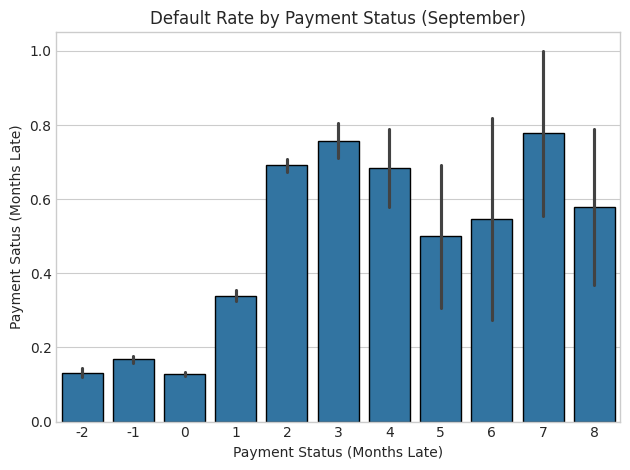

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

sns.barplot(
    data=df, 
    x='pay_status_sep', 
    y='default', 
    edgecolor='black'
)

plt.title('Default Rate by Payment Status (September)')
plt.xlabel('Payment Status (Months Late)')
plt.ylabel('Payment Satus (Months Late)')
plt.tight_layout()
plt.show()

In [12]:
def bin_payment_status(x):
    if x <= 0:
        return 'on_time'
    elif x == 1:
        return '1_month_late'
    else:
        return '2+_months_late'
    
df['pay_status_sep_bin'] = df['pay_status_sep'].apply(bin_payment_status)

(
    df
    .groupby('pay_status_sep_bin')['default']
    .mean()
)

pay_status_sep_bin
1_month_late      0.339479
2+_months_late    0.695527
on_time           0.138340
Name: default, dtype: float64

## Default Rate by Payment Status

The most recent payment behavior (September) was analyzed as an initial
sanity check for credit risk dynamics. Default rates increase sharply and
monotonically as payment delays grow, confirming a strong relationship between
recent delinquency and default risk.

Clients who paid on time exhibit significantly lower default rates, while
clients with one or more months of delay present a substantial increase in
probability of default. This behavior aligns with real-world credit risk
patterns and validates payment status as a key driver for PD modeling.

In [18]:
pay_status_cols = [
    'pay_status_sep',
    'pay_status_aug',
    'pay_status_jul',
    'pay_status_jun',
    'pay_status_may',
    'pay_status_apr'
]

df['max_delay_6m'] = df[pay_status_cols].max(axis=1)
df['months_late_6m'] = (df[pay_status_cols] > 0).sum(axis=1)

df[['max_delay_6m', 'months_late_6m']].describe()

,max_delay_6m,months_late_6m
count,30000.000000,30000.000000
mean,0.438733,0.834200
std,1.345154,1.554303
min,-2.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,1.000000
max,8.000000,6.000000


In [19]:
(
    df
    .groupby('max_delay_6m')['default']
    .mean()
    .sort_index()
)

max_delay_6m
-2    0.134661
-1    0.147116
 0    0.108306
 1    0.249852
 2    0.435509
 3    0.622307
 4    0.642202
 5    0.507246
 6    0.560000
 7    0.835821
 8    0.560000
Name: default, dtype: float64

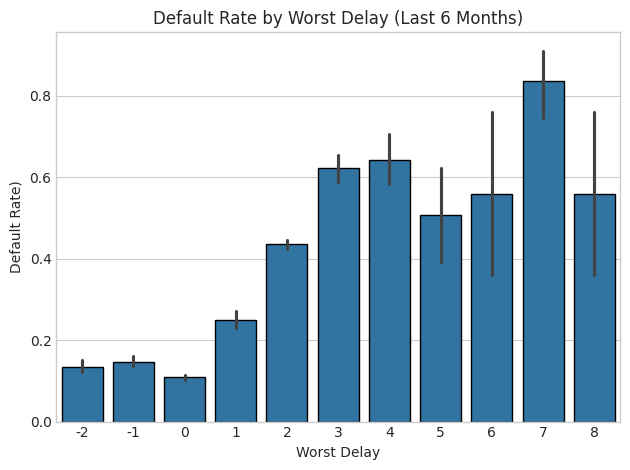

In [20]:
sns.barplot(
    data=df, 
    x='max_delay_6m', 
    y='default', 
    edgecolor='black'
)

plt.title('Default Rate by Worst Delay (Last 6 Months)')
plt.xlabel('Worst Delay')
plt.ylabel('Default Rate)')
plt.tight_layout()
plt.show()

In [21]:
(
    df
    .groupby('months_late_6m')['default']
    .mean()
)

months_late_6m
0    0.117104
1    0.298238
2    0.387572
3    0.508666
4    0.573081
5    0.573826
6    0.703207
Name: default, dtype: float64

In [22]:
def bin_max_delay(x):
    if x <= 0:
        return 'no_delay'
    elif x == 1:
        return '1_month'
    elif x == 2:
        return '2_months'
    else:
        return '3+_months'
    
df['max_delay_6m_bin'] = df['max_delay_6m'].apply(bin_max_delay)

def bin_months_late(x):
    if x == 0:
        return 'no_late'
    elif x <= 2:
        return '1-2_months'
    else:
        return '3+_months'

df['month_late_6m_bin'] = df['months_late_6m'].apply(bin_months_late)

display(
    df
    .groupby('max_delay_6m_bin')['default']
    .mean()
)

display(
    df
    .groupby('month_late_6m_bin')['default']
    .mean()
)

max_delay_6m_bin
1_month      0.249852
2_months     0.435509
3+_months    0.628667
no_delay     0.117104
Name: default, dtype: float64

month_late_6m_bin
1-2_months    0.325059
3+_months     0.599893
no_late       0.117104
Name: default, dtype: float64

## Payment Behavior Over Time

Default risk increases not only with recent delinquency but also with the
severity and persistence of payment delays over time. Clients presenting
multiple months in arrears or severe delays in the last six months exhibit
substantially higher default rates.

Aggregated behavioral indicators, such as the worst delay and the number of
months in arrears, provide a more robust and stable representation of credit
risk than single-period observations. These patterns are consistent with
real-world credit risk dynamics and reinforce the relevance of behavioral
features for PD modeling.

In [23]:
df[['credit_limit', 'default']].corr()

,credit_limit,default
credit_limit,1.00000,-0.15352
default,-0.15352,1.00000


In [ ]:
df['credit_limit_bin'] = pd.qcut(
    df['credit_limit'],
    q=5,
    duplicates='drop'
)